In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('amazon_alexa.tsv', delimiter='\t' , quoting=3)


In [7]:
data.shape


(3150, 5)

In [8]:
data.columns


Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [9]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
data.info

<bound method DataFrame.info of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     "Sometimes while playing a game, you can answe...         1  
3     "I have had a lot of fun with this thing. My 4...         1  
4                                                 Music         1  
...                

In [15]:
#pip install nltk

In [18]:
#pip install regex

In [19]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prath\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
corpus =[]
for i in range(0,1000):
   review =re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['verified_reviews'][i])

   review = review.lower()
   review_words = review.split()
   review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

   ps= PorterStemmer()
   review =[ps.stem(word) for word in review_words]

   review = ' '.join(review)
   corpus.append(review)

TypeError: expected string or bytes-like object, got 'float'

In [22]:
corpus[:1500]

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X =cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [473, 3150]

In [25]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier =MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 =accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 76.5%
Precision score is 76.5%
recall score is 78.641%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual Values')

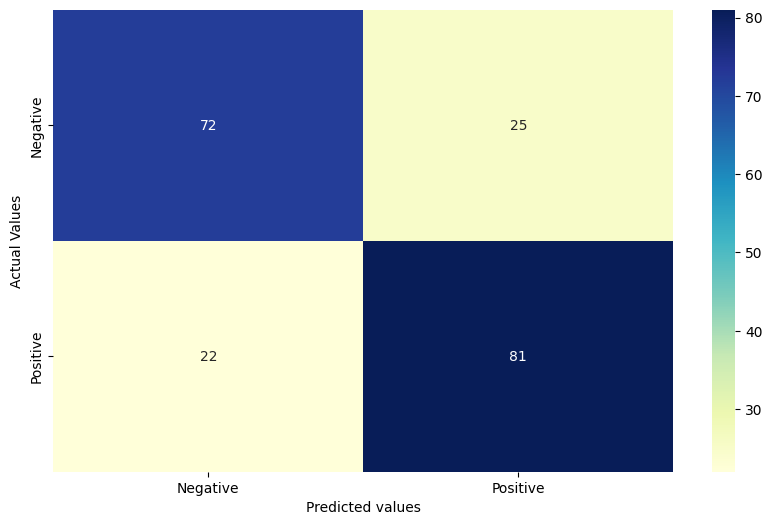

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

In [ ]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy =0.0
alpha_val =0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier =MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred =temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy=score
     alpha_val =i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 1)))

Accuracy Score for alpha=0.1 is 78.0%
Accuracy Score for alpha=0.2 is 78.5%
Accuracy Score for alpha=0.3 is 78.0%
Accuracy Score for alpha=0.4 is 78.0%
Accuracy Score for alpha=0.5 is 77.5%
Accuracy Score for alpha=0.6 is 77.5%
Accuracy Score for alpha=0.7 is 77.5%
Accuracy Score for alpha=0.8 is 77.0%
Accuracy Score for alpha=0.9 is 76.5%
Accuracy Score for alpha=1.0 is 76.5%
----------------------------------------------------
The Best Accuracy Score is 78.5% with alpha value as 0.2


In [ ]:
classifier =MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [ ]:
sample_review ='The food is really bad.'

if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

Negative review


In [ ]:
sample_review ='Food was pretty bad and the service was very slow'

if predict_sentiment(sample_review):
  print(" Positive review")

else:
  print(" Negative review")

 Negative review


In [ ]:
sample_review ='The food  was absolutely wonderful,from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")

This is a Positive review


In [ ]:
sample_review ='food averag'

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")



This is a Negative review
